In [1]:
import math
import pandas as pd
import numpy as np
from scipy import stats

In [8]:
def split_data_to_fold(df : pd.DataFrame, seed : int, folds : int):

    data_per_fold = df.shape[0] // folds
    remainder =  df.shape[0] % folds

    size_list = [data_per_fold]*folds
    for i in range(remainder):
        size_list[i] += 1

    sample_df = df.sample(frac=1.0, random_state=seed, ignore_index=True)
    dfs = []
    
    start_index = 0
    for i in range(len(size_list)):
        
        dfs.append(sample_df.iloc[start_index : start_index + size_list[i]] )
        start_index += size_list[i]

    return dfs

def CalculateRMSE(x_positions, y_positions, w0, w1):
    n = len(x_positions)
    RMSE = 0
    for i in range(0, n):
        RMSE += (w0 + w1*x_positions[i] - y_positions[i]) ** 2
    RMSE *= 1/(n)
    return RMSE**(1/2)

def CalculateMAE(x_positions, y_positions, w0, w1):
    n = len(x_positions)
    MAE = 0
    for i in range(0, n):
        MAE += abs(w0 + w1*x_positions[i] - y_positions[i])
    MAE *= 1/n
    return MAE

def CalculateRAE(x_positions, y_positions, w0, w1):
    n = len(y_positions)
    y_bar = sum(y_positions) / n
    
    err_from_model = 0
    err_from_avg = 0
    for i in range(0,n):
        err_from_model += abs(y_positions[i] - (w0 + w1*x_positions[i]))
        err_from_avg += abs(y_positions[i] - y_bar)
    return err_from_model / err_from_avg

def CalculateRRSE(x_positions, y_positions, w0, w1):
    n = len(y_positions)
    y_bar = sum(y_positions) / n
    
    err_from_model = 0
    err_from_avg = 0
    for i in range(0,n):
        err_from_model += (y_positions[i] - (w0 + w1*x_positions[i]))**2
        err_from_avg += (y_positions[i] - y_bar)**2
    return (err_from_model / err_from_avg)**(1/2)

def train(df):
    slope, intercept, r, p, se = stats.linregress(df["Height"], df["Weight"])
    return slope,intercept,r

def cross_validation(fold_data):
    metric_dict = {}
    RMSE = []
    MAE = []
    r_list = []
    RAE = []
    RRSE = []
    for i in range(len(fold_data)):
        test_df = fold_data[i]
        test_df.reset_index(inplace=True)
        train_df = list(fold_data)
        train_df.pop(i)
        slope,intercept,r = train(pd.concat(train_df, ignore_index=True))
        RMSE.append(CalculateRMSE(test_df["Height"],test_df["Weight"],intercept,slope))
        MAE.append(CalculateMAE(test_df["Height"], test_df["Weight"], intercept, slope))
        RAE.append(CalculateRAE(test_df["Height"], test_df["Weight"], intercept, slope))
        RRSE.append(CalculateRRSE(test_df["Height"], test_df["Weight"], intercept, slope))
        r_list.append(r)
    metric_dict['RMSE'] = np.average(RMSE)
    metric_dict['MAE'] = np.average(MAE)
    metric_dict['r'] = np.average(r_list)
    metric_dict['RAE'] = np.average(RAE)
    metric_dict['RRSE'] = np.average(RRSE)
    return metric_dict

In [3]:
full_df = pd.read_csv("data/HeightWeight.csv")
fold_list = [2,3,5,10]
seed_num = 100
for fold in fold_list:
    av_rmse = []
    print(fold,"fold")
    for seed in range(seed_num):
        sample_20_df = full_df.sample(n=20, random_state=seed, ignore_index=True)
        for seed2 in range(seed_num):
            fold_df = split_data_to_fold(sample_20_df,seed2,fold)
            metrics = cross_validation(fold_df)
            av_rmse.append(metrics['RMSE'])
    print("Average RMSE:",np.average(av_rmse))
    print("Standard Daviation:",np.std(av_rmse),"\n")

2 fold
Average RMSE: 6.023418450032901
Standard Daviation: 1.1813779113171061 

3 fold
Average RMSE: 5.769825494083536
Standard Daviation: 0.9801790182306362 

5 fold
Average RMSE: 5.575179369262558
Standard Daviation: 0.9003566480347518 

10 fold
Average RMSE: 5.22179323917203
Standard Daviation: 0.8225488097086225 



In [ ]:
df = pd.read_csv("Data/Data/HeightWeight20.csv")
fold_list = [2,3,5,10]
seed_num = 20
for fold in fold_list:
    av_rmse = []
    print(fold,"fold")
    for seed in range(seed_num):
        fold_df = split_data_to_fold(df,seed,fold)
        metrics = cross_validation(fold_df)
        av_rmse.append(metrics['RMSE'])
    print("Average RMSE:",np.average(av_rmse))
    print("Standard Daviation:",np.std(av_rmse),"\n")

2 fold
Average RMSE: 7.878392508910231
Standard Daviation: 0.9596745477457709 

3 fold
Average RMSE: 7.579961787683762
Standard Daviation: 0.6298103414847346 

5 fold
Average RMSE: 7.380427783400544
Standard Daviation: 0.3219565738335285 

10 fold
Average RMSE: 7.165142062295994
Standard Daviation: 0.19423446283548268 



In [ ]:
df = pd.read_csv("Data/Data/HeightWeight100.csv")
fold_list = [2,3,5,10,20]
seed_num = 100
for fold in fold_list:
    av_rmse = []
    print(fold,"fold")
    for seed in range(seed_num):
        fold_df = split_data_to_fold(df,seed,fold)
        metrics = cross_validation(fold_df)
        av_rmse.append(metrics['RMSE'])
    print("Average RMSE:",np.average(av_rmse))
    print("Standard Daviation:",np.std(av_rmse),"\n")

2 fold
Average RMSE: 5.878908964807437
Standard Daviation: 0.15087336815996133 

3 fold
Average RMSE: 5.835675553733214
Standard Daviation: 0.10214413620726165 

5 fold
Average RMSE: 5.7973521493673275
Standard Daviation: 0.06866101602811307 

10 fold
Average RMSE: 5.7182868485361755
Standard Daviation: 0.06261744155341417 

20 fold
Average RMSE: 5.574856302766732
Standard Daviation: 0.07044651488932063 



In [ ]:
df = pd.read_csv("Data/Data/HeightWeight.csv")
slope,intercept = train(df)[0:2]
print("Reference:",CalculateRMSE(df["Height"],df["Weight"],intercept,slope))

Reference: 5.542246180431457


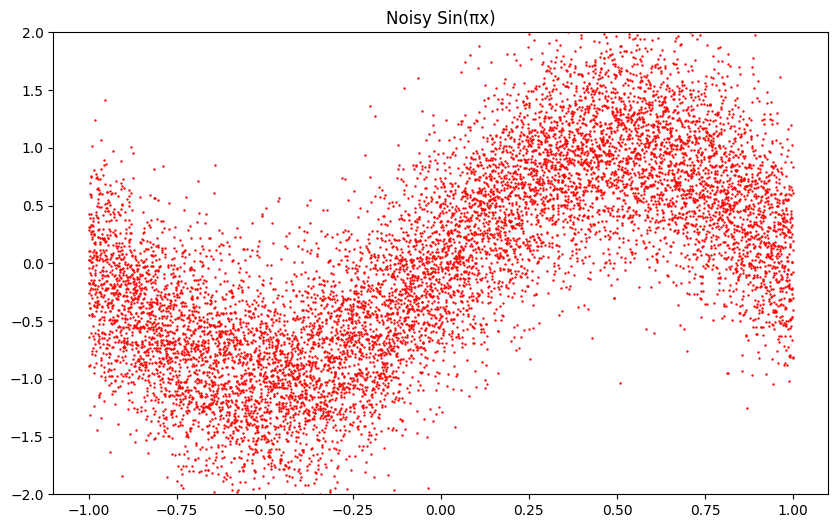

In [5]:
# x and y given as DataFrame columns
import matplotlib.pyplot as plt

df = pd.read_csv("data/sin_noisy.csv")
plt.figure(figsize=(10, 6))
plt.ylim(-2, 2)
plt.title("Noisy Sin(πx)")

plt.scatter(df['x'], df['y'], color='r', s=0.5)

In [10]:
full_df = pd.read_csv("data/sin_noisy.csv")
# full_df = pd.read_csv("data/HeightWeight.csv")
seed_num = 100
max_test = 16
num_sample = 500
err_av_np = np.array([0.0]*max_test)
err_var_np = np.array([0.0]*max_test)
for j in range(num_sample):
    err_av = []
    err_var = []
    sample_20_df = full_df.sample(n=20, random_state=j, ignore_index=True)
    for k in range(1, max_test+1):
        MSE = []
        for seed in range(seed_num):
            sample_20_df = sample_20_df.sample(
                frac=1.0, random_state=seed, ignore_index=True)
            test_df = sample_20_df.iloc[0:k]
            train_df = sample_20_df.iloc[k:].reset_index(drop=True)
            slope, intercept = stats.linregress(
                train_df["x"], train_df["y"])[0:2]

            MSE.append(CalculateRMSE(
                test_df["x"], test_df["y"], intercept, slope))
        err_av.append(np.average(MSE))
        err_var.append(np.var(MSE))
    err_av_np += np.array(err_av)
    err_var_np += np.array(err_var)
err_av_np /= num_sample
err_var_np /= num_sample

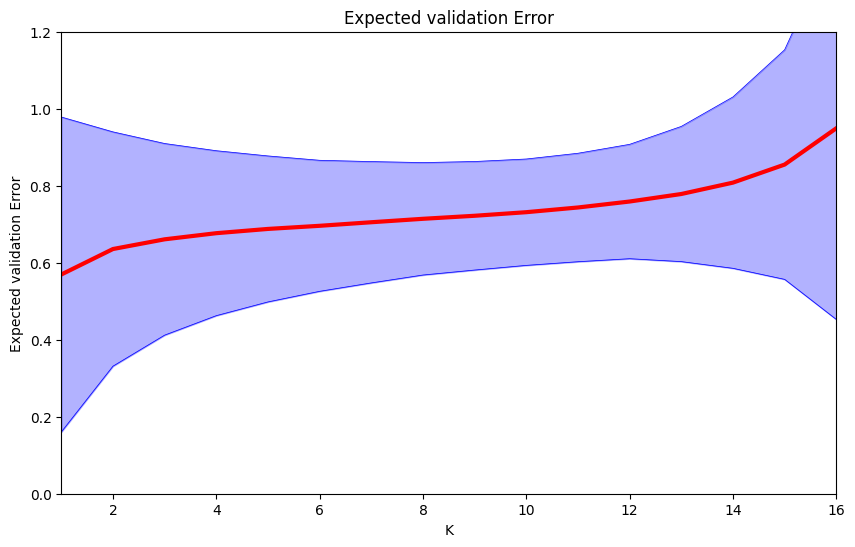

In [12]:

plt.figure(figsize=(10, 6))
plt.ylim(0, 1.2)
plt.xlim(1, 16)
plt.title("Expected validation Error")
plt.xlabel("K")
plt.ylabel("Expected validation Error")

# Sin graph
x_vals = np.array(range(1, max_test+1))
y_vals = err_av_np
plt.plot(x_vals, y_vals, '-', color='r', linewidth=3)


var1 = (err_var_np**(1/2)) + np.array(y_vals)
plt.plot(x_vals, var1, '-', color='b', linewidth=0.5)

var2 = np.array(y_vals) - (err_var_np**(1/2))
plt.plot(x_vals, var2, '-', color='b', linewidth=0.5)
plt.fill_between(x_vals, var2, var1, color='b', alpha=0.3)
